Cargar los archivos .wav del dataset para ver su nivel.

In [19]:
import os
import numpy as np
import librosa
import pyloudnorm as pyln
import matplotlib.pyplot as plt
import librosa


In [20]:


blues_path = 'C:\\Users\\jalma\\Repositories\\machine_learning_challenge\\dataset\\genres_original\\blues'

for file in os.listdir(blues_path)[:10]:
    file_path = os.path.join(blues_path, file)
    y, sr = librosa.load(file_path)

    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    print(f'Loudness of the file {file}: {loudness} dB')



Loudness of the file blues.00000.wav: -17.52670922146246 dB
Loudness of the file blues.00001.wav: -20.43872645327597 dB
Loudness of the file blues.00002.wav: -14.903780159169354 dB
Loudness of the file blues.00003.wav: -17.555090139318697 dB
Loudness of the file blues.00004.wav: -19.132409971047515 dB
Loudness of the file blues.00005.wav: -17.538009932545254 dB
Loudness of the file blues.00006.wav: -14.66566864811852 dB
Loudness of the file blues.00007.wav: -16.17836928978003 dB
Loudness of the file blues.00008.wav: -17.734219835079404 dB
Loudness of the file blues.00009.wav: -18.095996136305267 dB


Ahora hago lo mismo pero con las inferencias

Veo los espectrogramas de algunos de los audios en el dataset

In [21]:
def split_audio(y: np.ndarray,
                sr: int,
                segment_length: int = 3) -> list:    
    """
    Splits an audio file into a specified number of equal segments.

    Parameters
    ----------
    y : np.ndarray
        Audio signal to split.
    sr : int
        Sample rate of the audio signal.
    n_segments : int
        The number of segments to split the audio into (default is 10).
    
    Returns
    -------
    list of np.ndarray
        A list containing the audio segments as numpy arrays.
    """
    samples_per_segment = sr * segment_length
    n_segments = len(y) // samples_per_segment
    remainder = len(y) % samples_per_segment
    segments = []

    start = 0 
    for i in range(n_segments):
        end = start + samples_per_segment

        if i < remainder:
            end += 1
        segment = y[start:end]
        segments.append(segment)
        start = end

    return segments

segment_length = 3
segments = split_audio(y, sr, segment_length)
expected_segment_length = sr * segment_length

for i, segment in enumerate(segments):
    segment = librosa.util.fix_length(segment, size=expected_segment_length)
    
    S = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=1024, 
                                        hop_length=512, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    assert S_dB.shape == (128, 130), \
        f"Inconsistent spectrogram shape: {S_dB.shape}"  
    

In [22]:
def plot_spec(fs, S_dB):
    fig, ax = plt.subplots(figsize=(5,3))
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=fs,
                            fmax=16000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB', ticks=[0, -20, -40, -60, -80])
    plt.yticks([512, 1024, 2048, 4096, 8192], ['0.5', '1', '2', '4', '8'])
    plt.ylabel('Frecuency [kHz]')
    plt.xlabel('Time [s]')
    plt.title(f'segment number {i}')
    plt.tight_layout()
    plt.subplots_adjust(left=0.11, right=0.995, top=0.98, bottom=0.15)
    plt.show()

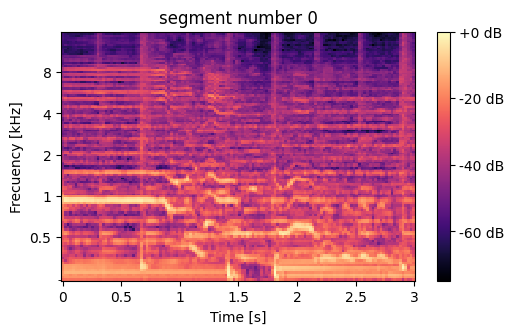

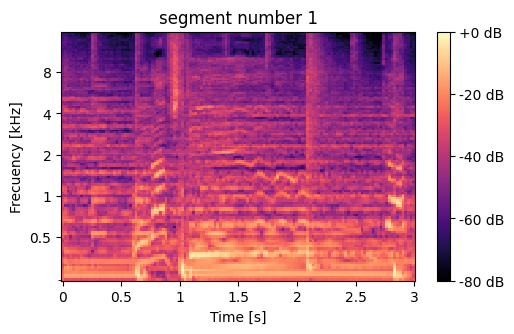

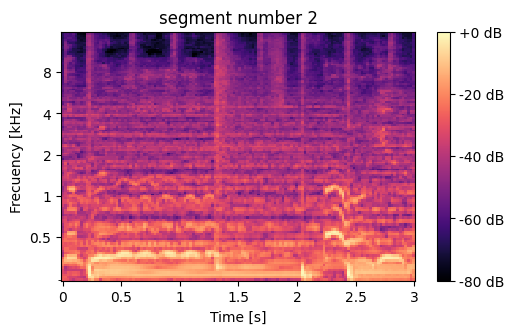

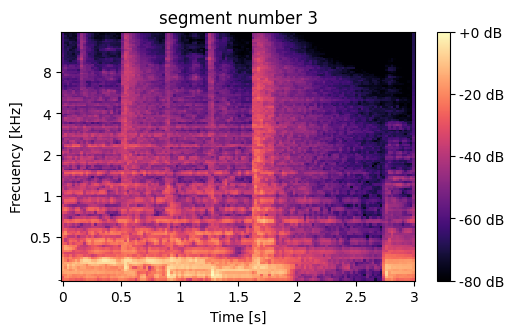

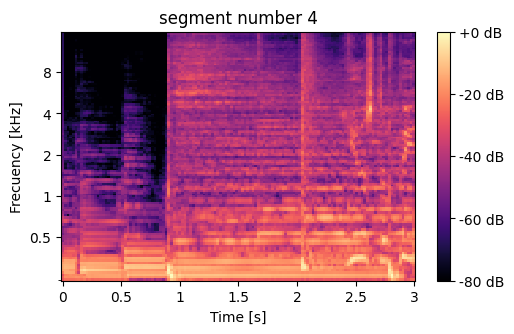

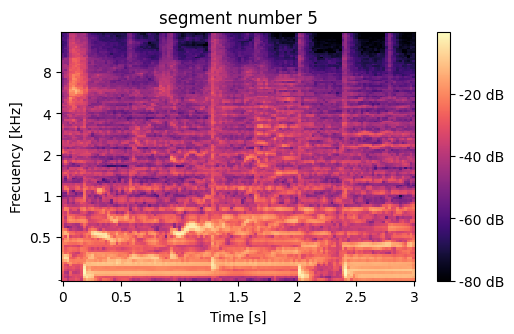

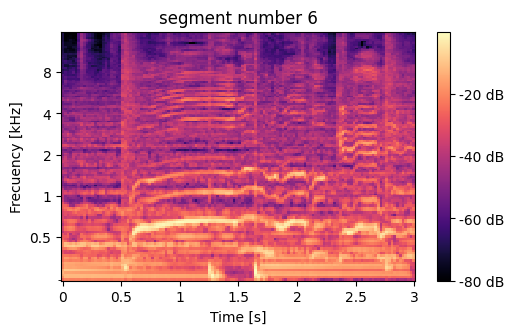

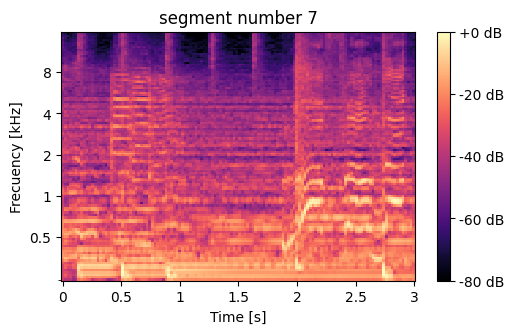

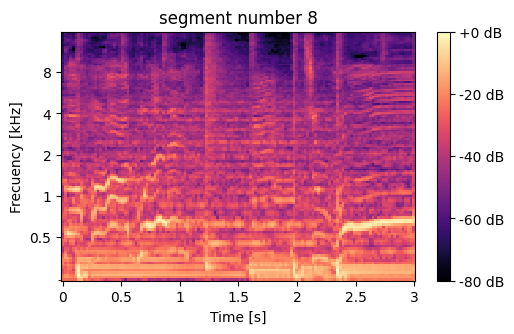

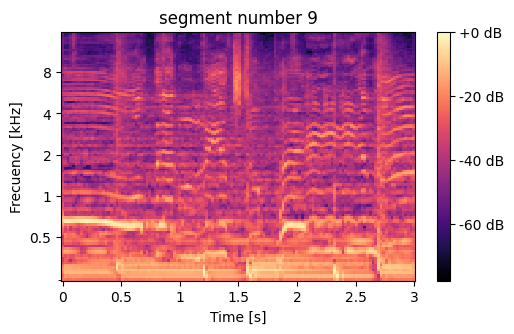

Loudness of the file Blues_Gary Moore_Still Got The Blues.wav: -17.744620485559985 dB


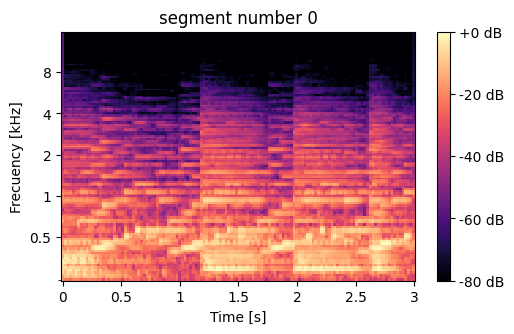

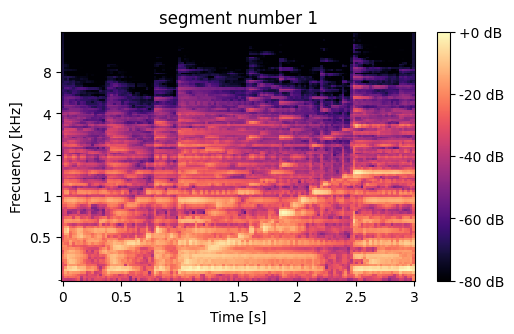

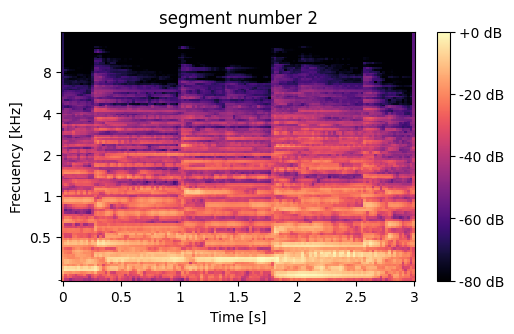

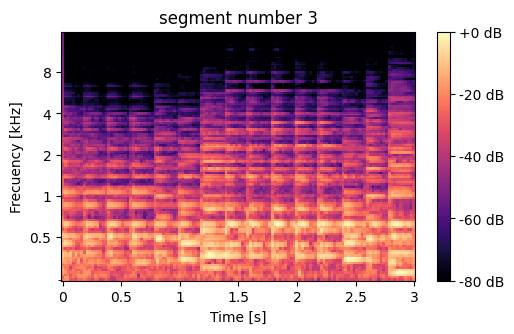

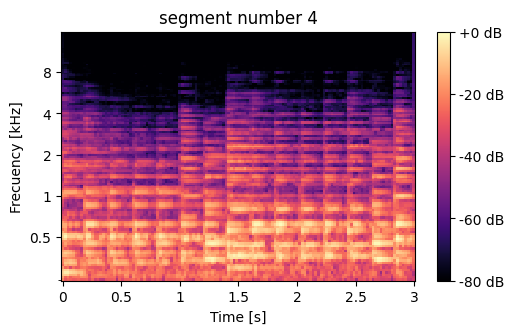

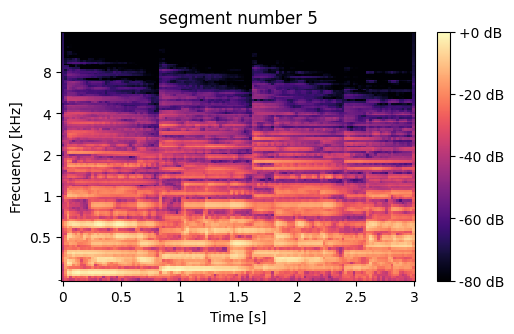

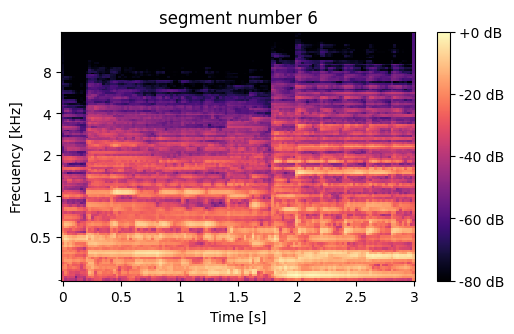

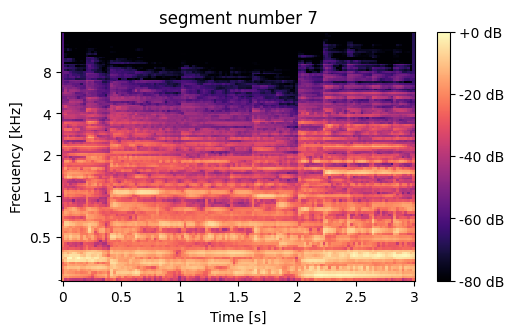

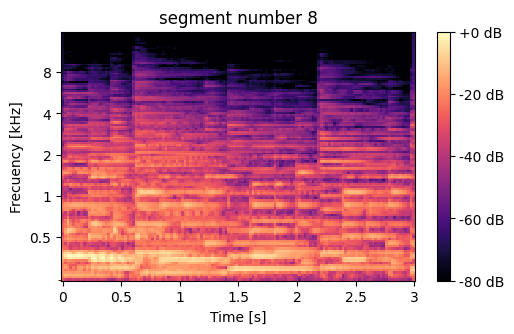

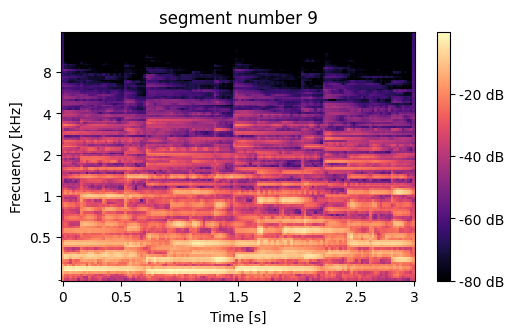

Loudness of the file Classical_Beethoven_Moonlight Sonata (3rd Movement).wav: -17.673970274454476 dB


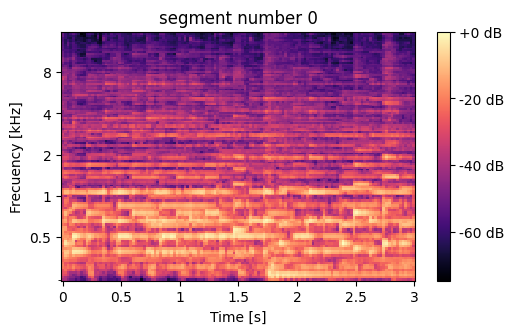

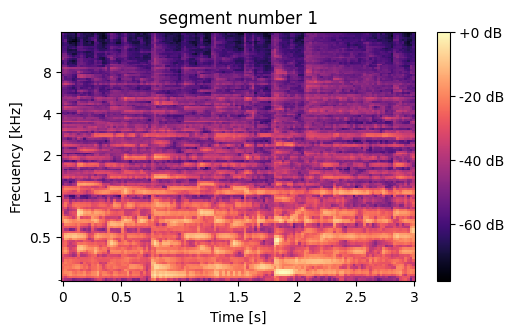

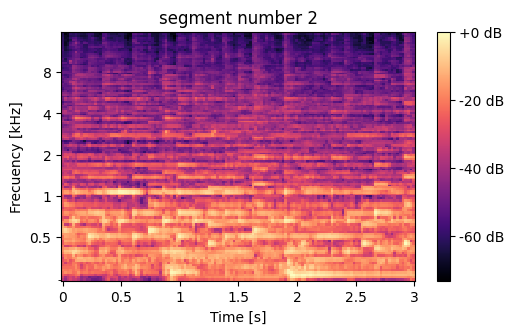

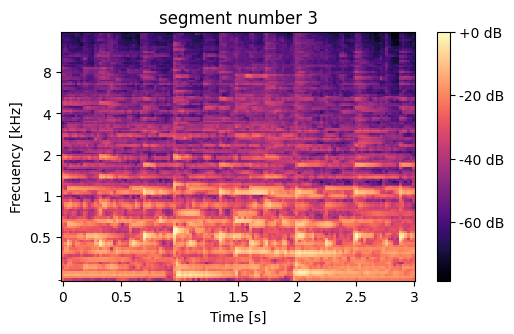

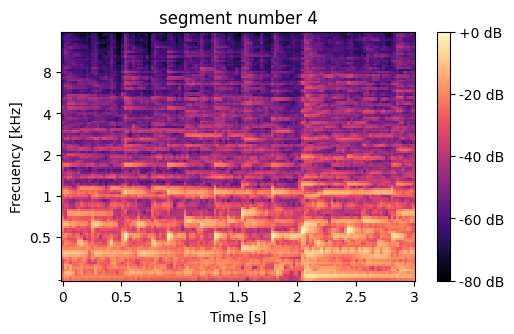

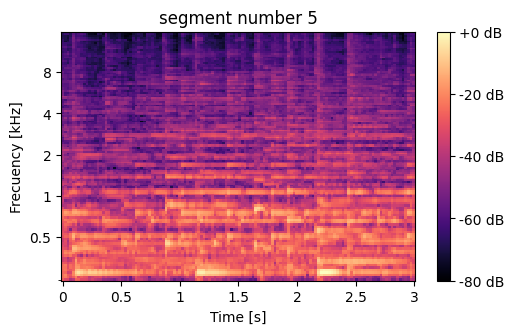

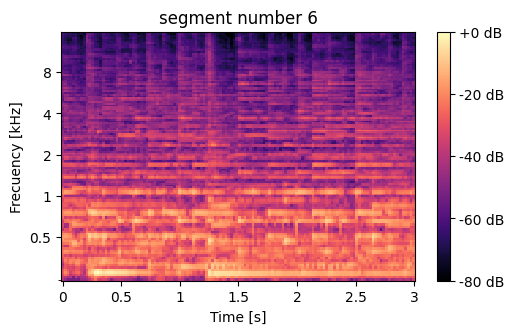

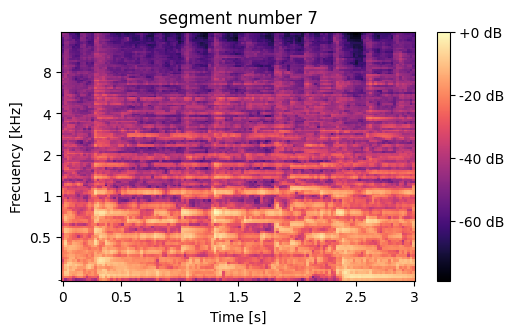

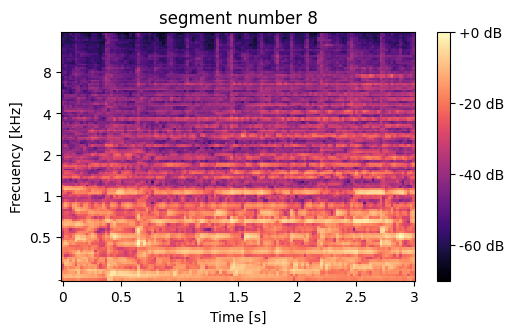

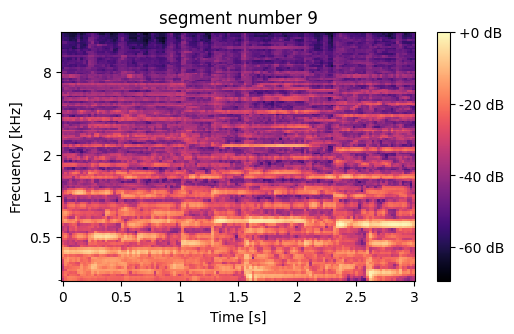

Loudness of the file Country_Bela Fleck_Big Country.wav: -17.626018895276108 dB


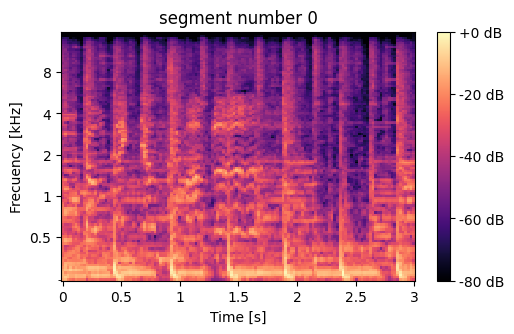

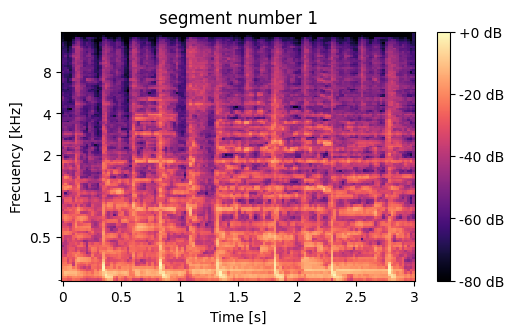

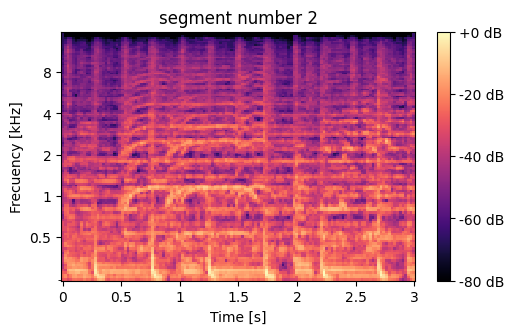

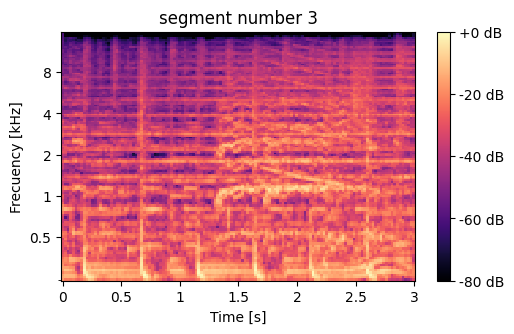

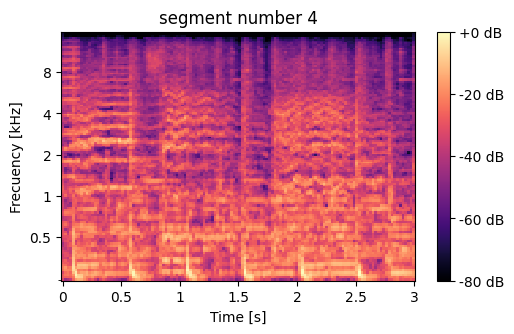

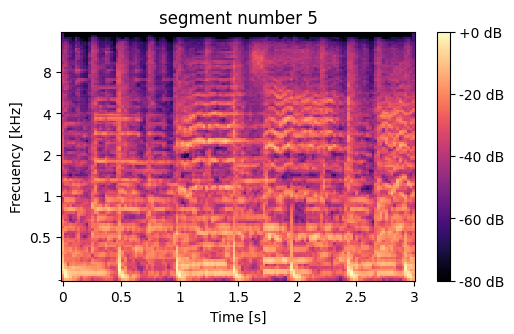

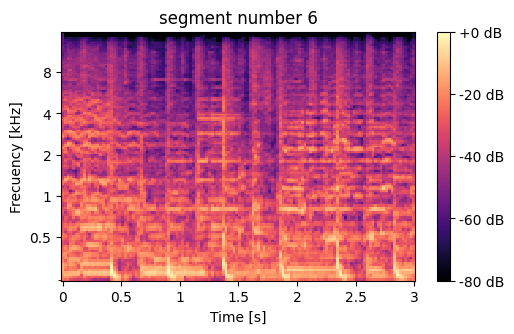

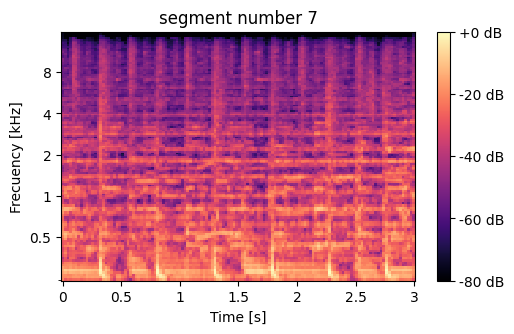

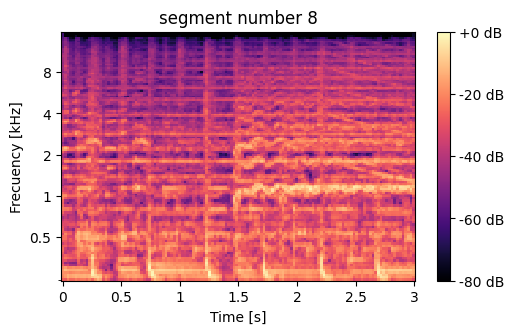

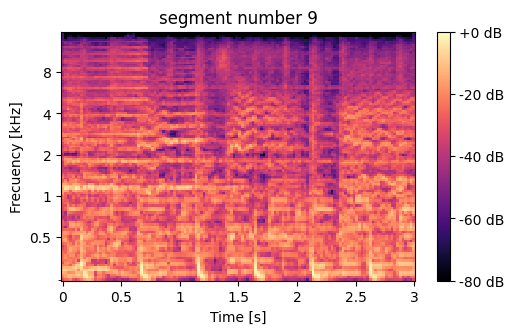

Loudness of the file Disco_Bee Gees_You Should Be Dancing.wav: -20.78247146190785 dB


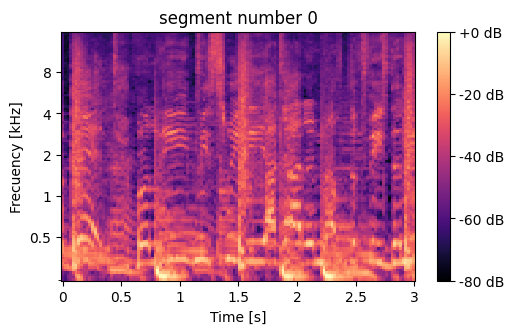

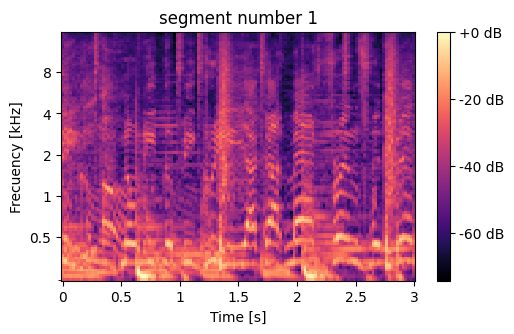

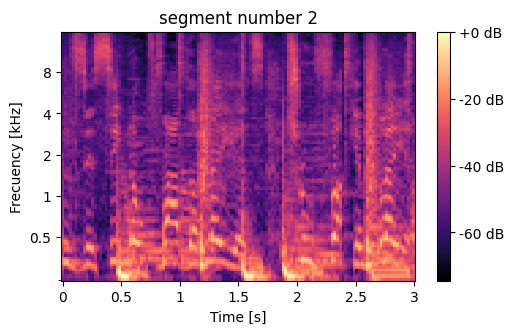

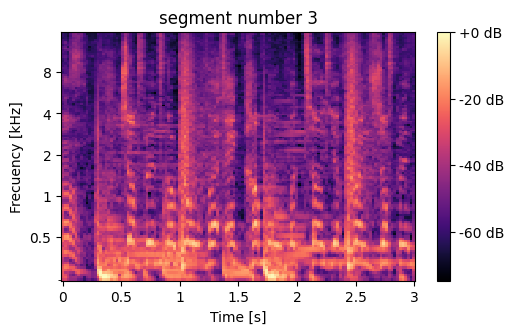

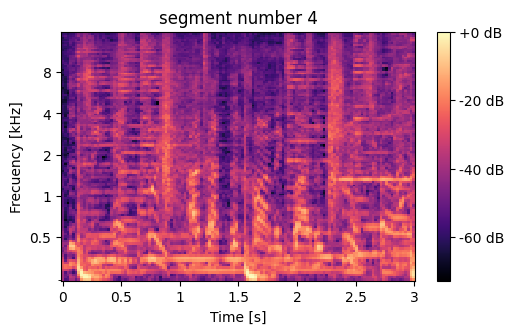

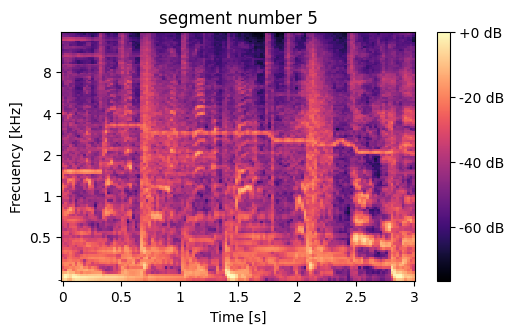

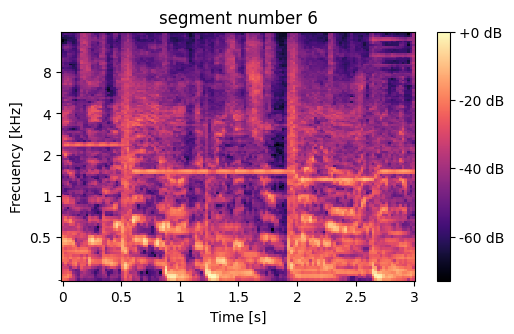

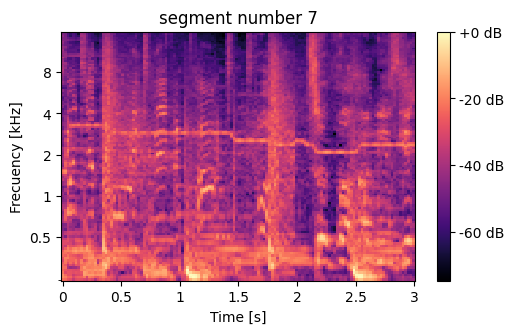

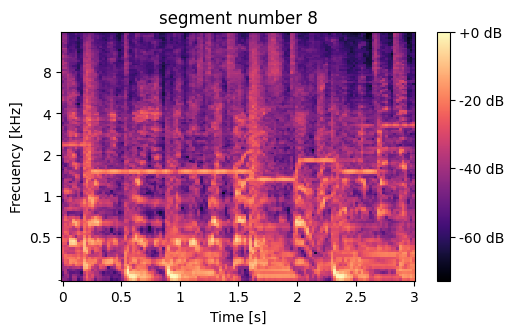

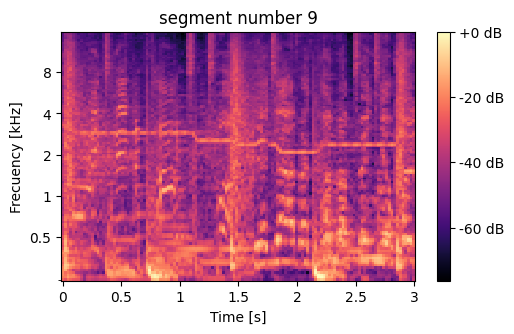

Loudness of the file HipHop_The Notorious B.I.G._Big Poppa.wav: -11.96901185593204 dB


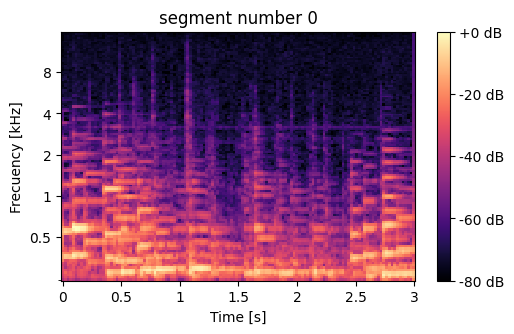

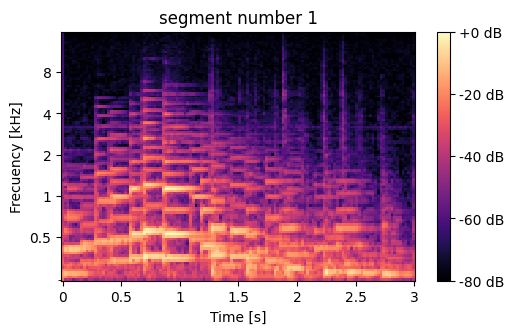

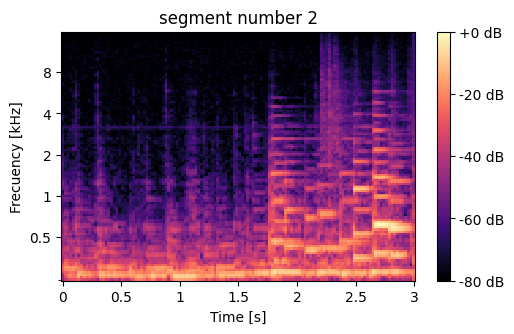

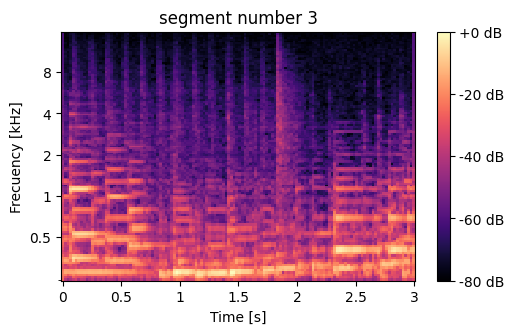

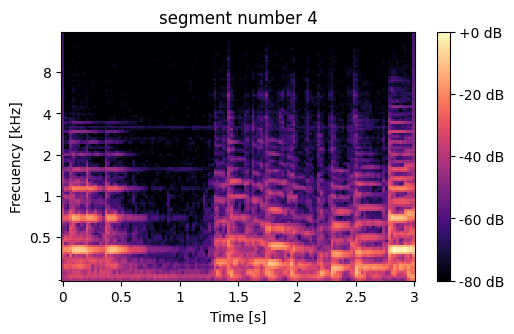

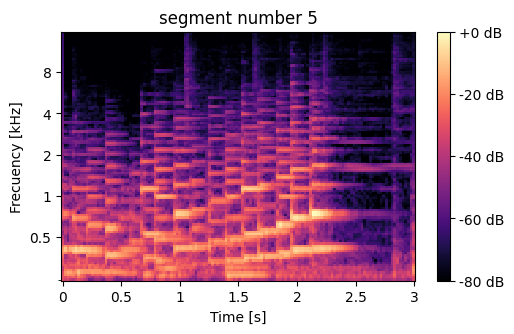

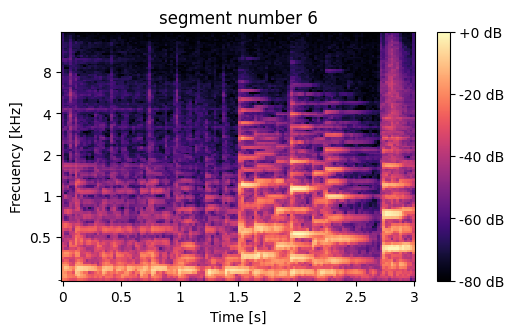

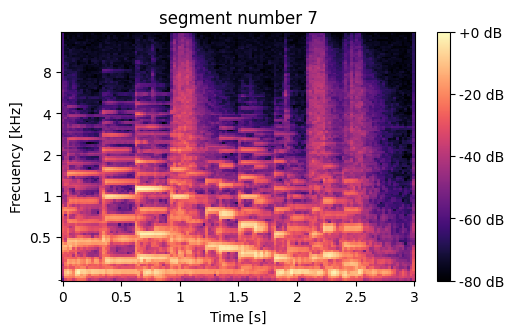

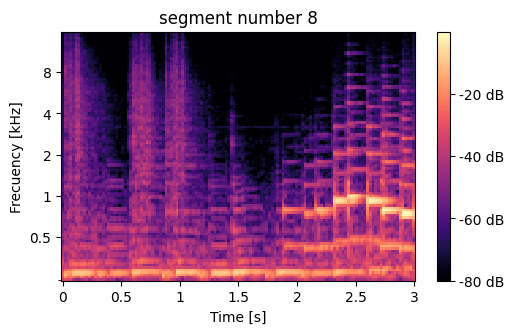

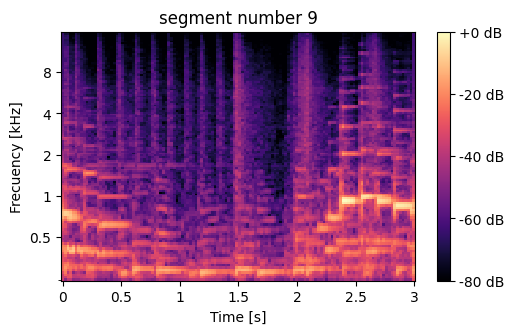

Loudness of the file Jazz_Bill Evans Trio_Autumn Leaves.wav: -20.832582281307495 dB


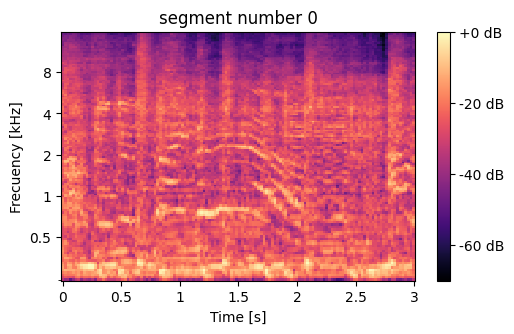

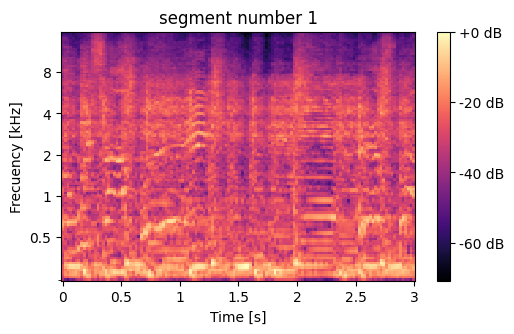

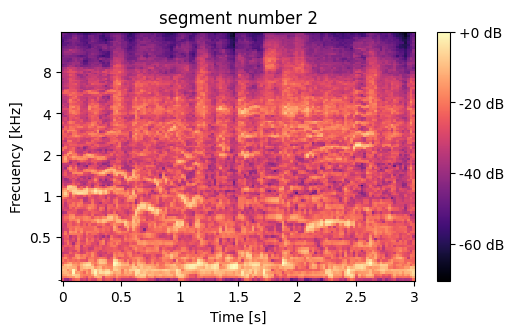

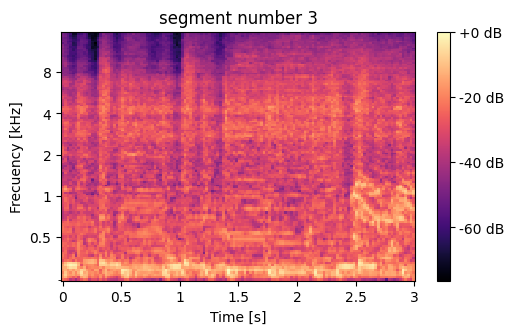

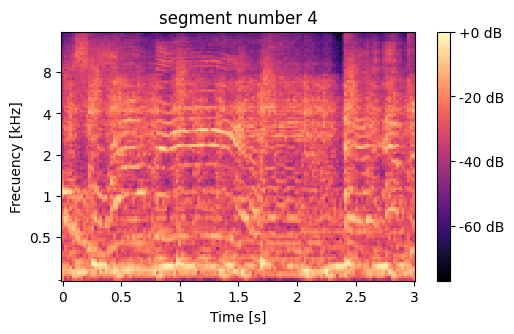

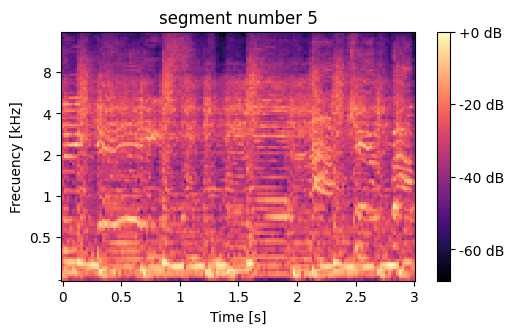

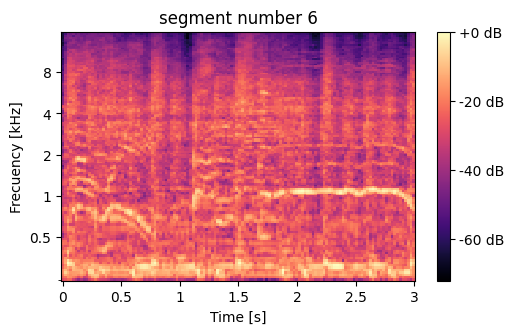

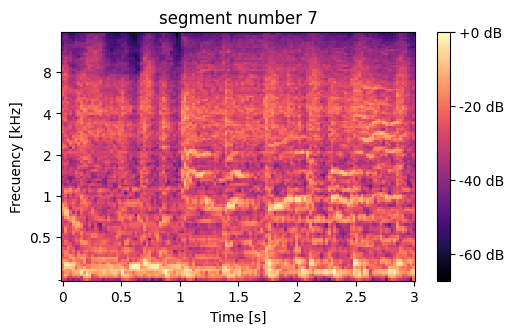

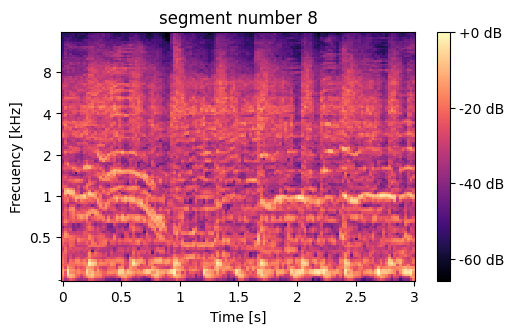

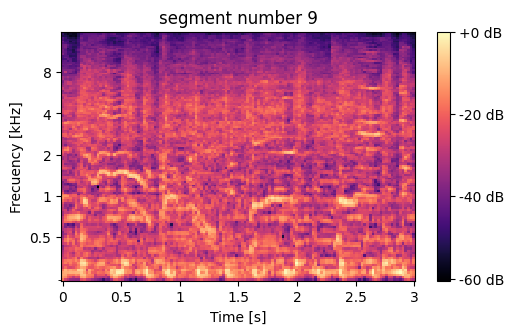

Loudness of the file Metal_Anthrax_Madhouse.wav: -19.887796990126308 dB


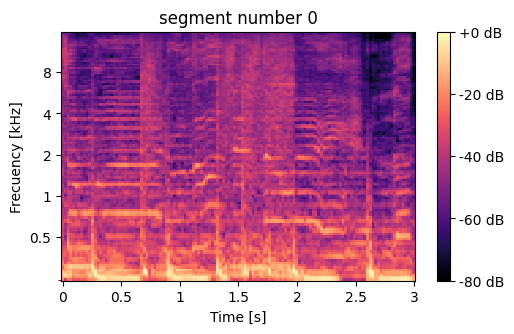

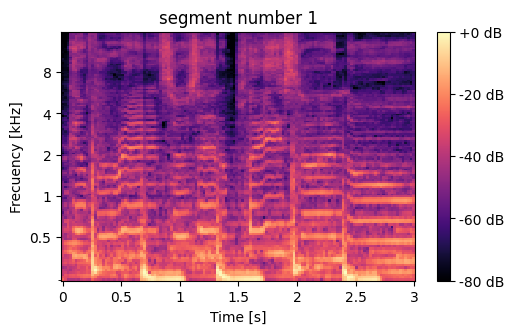

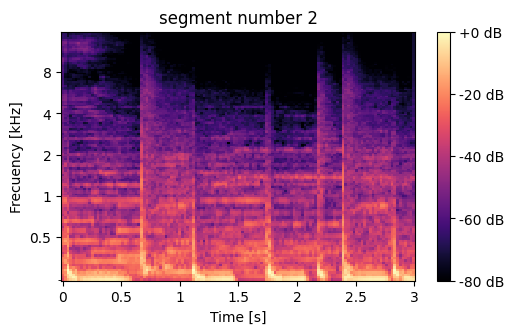

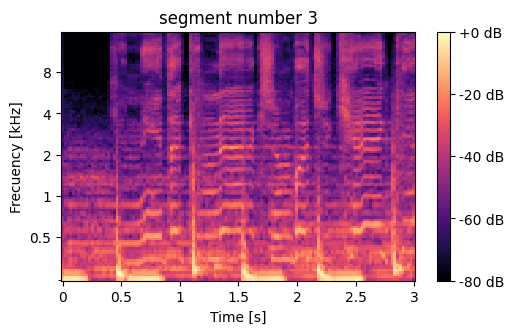

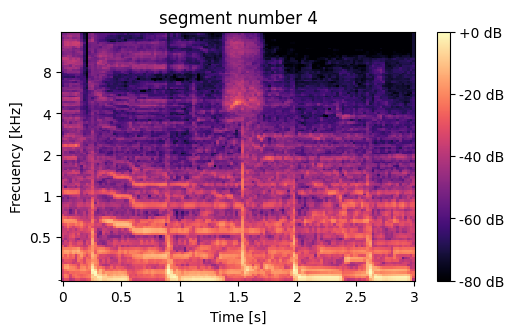

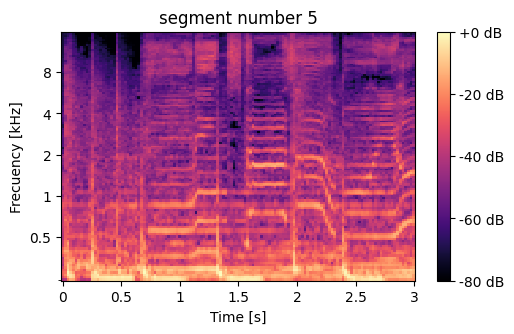

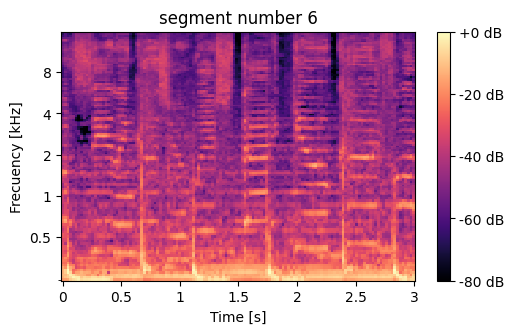

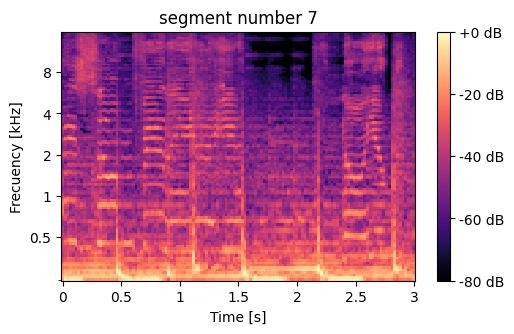

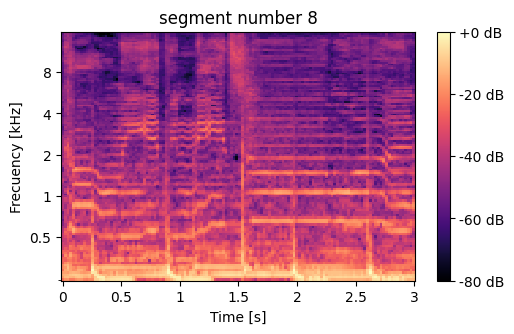

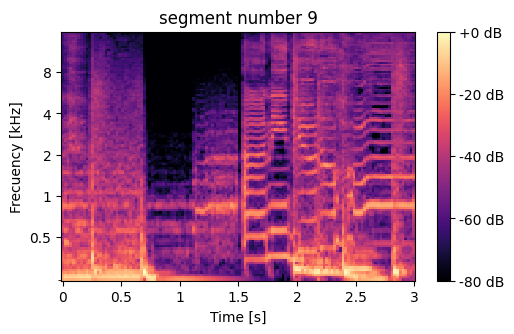

Loudness of the file Pop_Justin Bieber_Hold On.wav: -10.507348455902646 dB


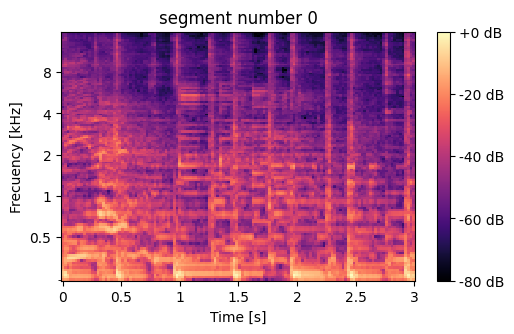

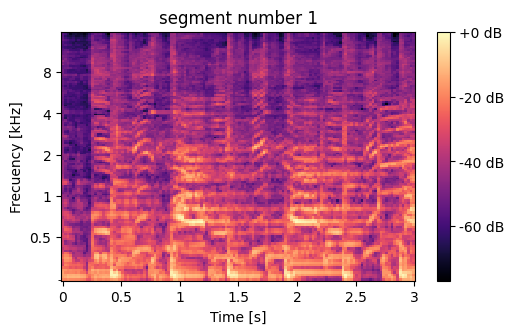

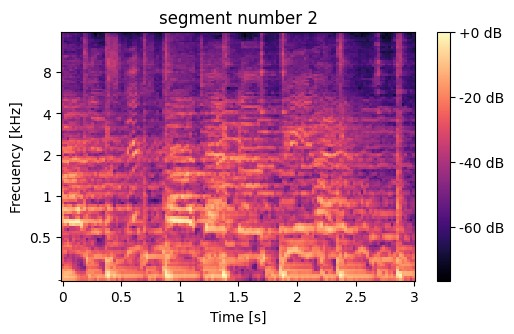

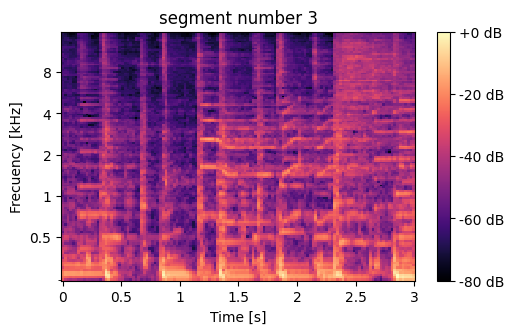

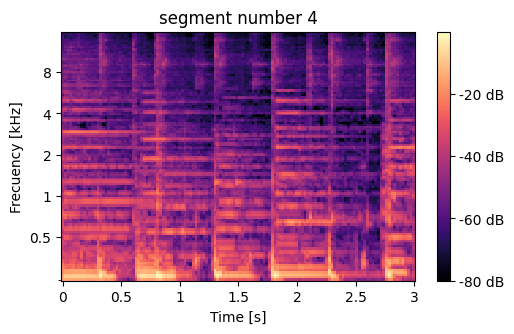

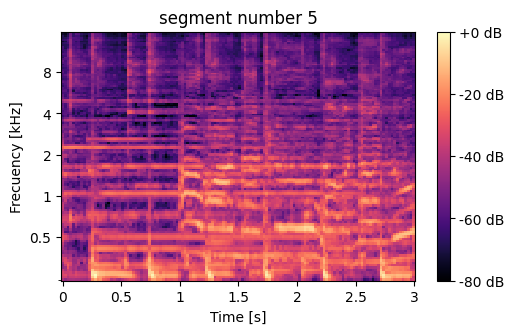

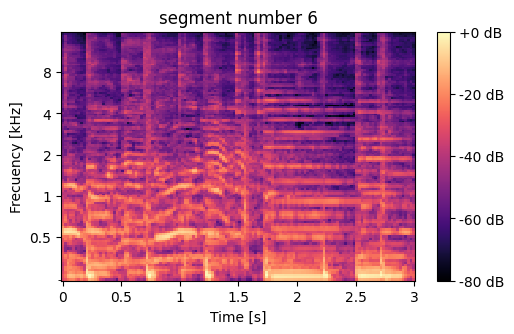

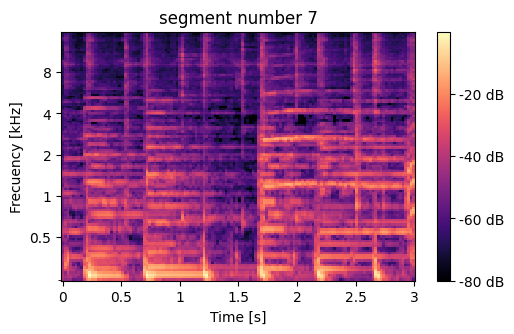

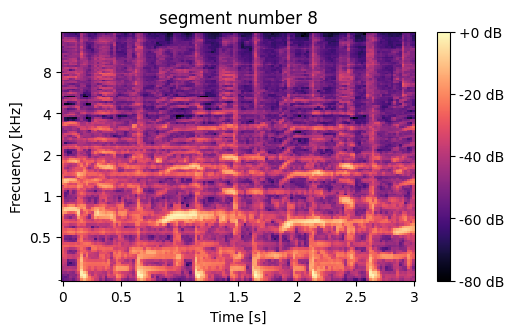

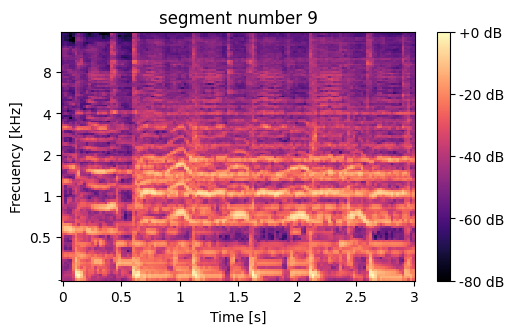

Loudness of the file Reggae_Bob Marley_Is This Love.wav: -19.915366115640953 dB


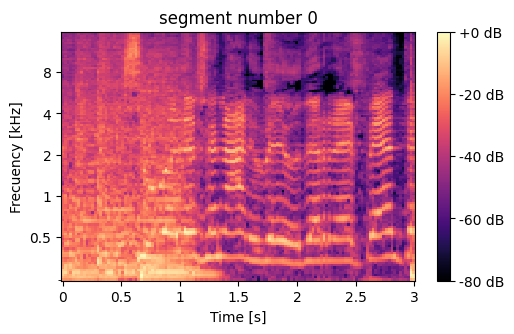

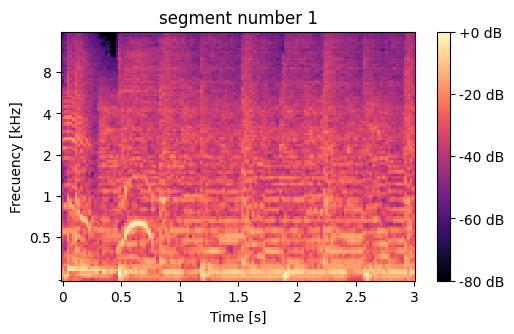

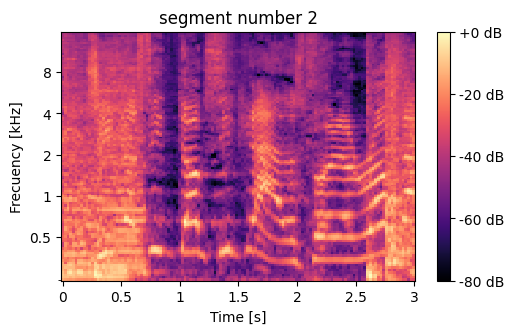

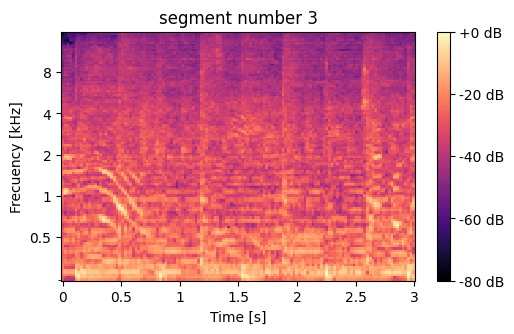

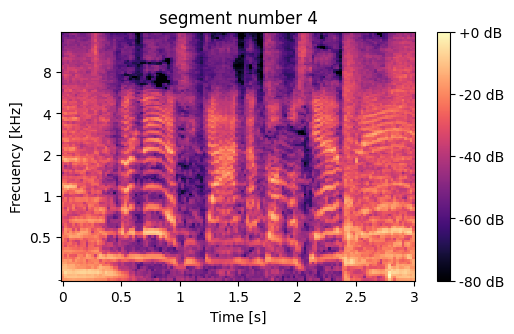

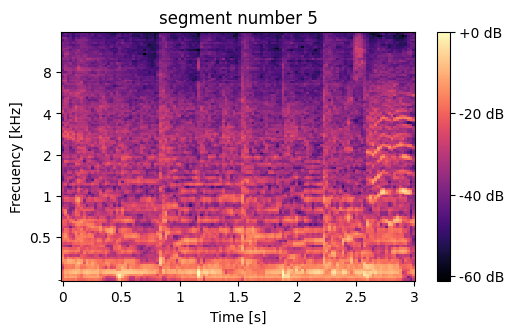

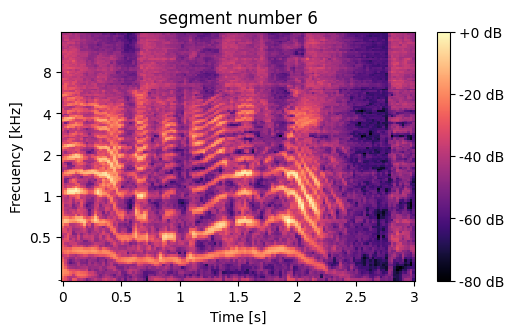

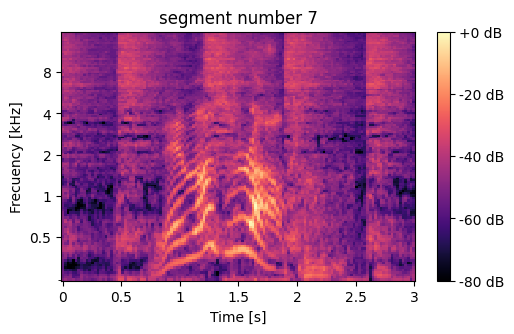

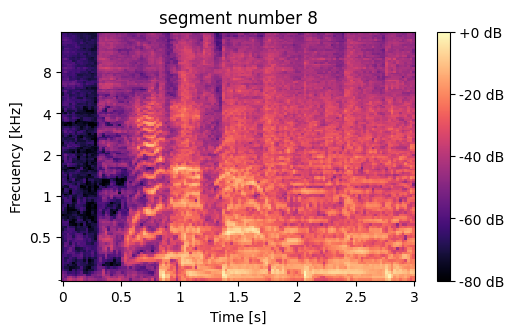

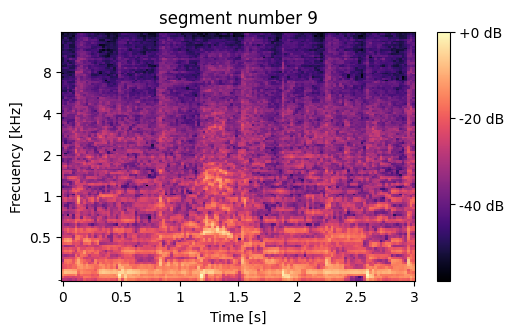

Loudness of the file Rock_Intoxicados_Quieren Rock.wav: -11.271464398681072 dB


In [24]:
inference_path = 'C:\\Users\\jalma\\Repositories\\machine_learning_challenge\\songs\\wav'
import matplotlib.pyplot as plt

for file in os.listdir(inference_path):
    file_path = os.path.join(inference_path, file)
    y, sr = librosa.load(file_path)

    segment_length = 3
    segments = split_audio(y, sr, segment_length)
    expected_segment_length = sr * segment_length
    for i, segment in enumerate(segments[20:30]):
        segment = librosa.util.fix_length(segment, size=expected_segment_length)
        
        S = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=1024, 
                                            hop_length=512, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)
        plot_spec(sr, S_dB=S_dB)
        
        assert S_dB.shape == (128, 130), \
            f"Inconsistent spectrogram shape: {S_dB.shape}"  
        
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    print(f'Loudness of the file {file}: {loudness} dB')